# 전국 도시 공원 표준 데이터

데이터출처>>

In [14]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn

#  한글글꼴로 변경
plt.rcParams['font.size'] = 20.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])
print(plt.rcParams['font.size'])

import folium

import warnings
warnings.filterwarnings('ignore')

['Malgun Gothic']
20.0


In [15]:
# from plotnine import *

In [16]:
# 지도 표현을 위해
import folium

# 데이터프레임생성

In [17]:
park = pd.read_csv('../data/전국도시공원표준데이터.csv',encoding='euc=kr') # encoding은 보통 euc-kr 이나 utf-8 이나 cp949
park.shape

(17967, 20)

In [18]:
park.head(2)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26290-00001,대연공원,근린공원,NaN,부산광역시 남구 대연동 산100-1일원,35.140147,129.094511,55227.0,NaN,NaN,NaN,NaN,NaN,1944-01-03,NaN,NaN,2018-08-14,3310000,부산광역시 남구,NaN
1,26290-00003,당곡공원,역사공원,NaN,부산광역시 남구 대연동 산205-2,35.125023,129.091385,75465.0,NaN,NaN,NaN,NaN,NaN,1944-01-08,NaN,NaN,2018-08-14,3310000,부산광역시 남구,NaN


## 데이터프레임 정보 확인
- 

# 결측치 확인하기
- 데이터프레임명.isnull().sum()
- 데이터프레임명.isnull()

In [19]:
park.isnull()
park.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소         8778
소재지지번주소           904
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13220
공원보유시설(유희시설)    11141
공원보유시설(편익시설)    13020
공원보유시설(교양시설)    16820
공원보유시설(기타시설)    14794
지정고시일            2790
관리기관명             540
전화번호              968
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     17967
dtype: int64

# 불필요한 컬럼 제거하기

In [20]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [21]:
park.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명'], inplace=True)
park

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26290-00001,대연공원,근린공원,NaN,부산광역시 남구 대연동 산100-1일원,35.140147,129.094511,55227.0,NaN,2018-08-14,3310000,부산광역시 남구,NaN
1,26290-00003,당곡공원,역사공원,NaN,부산광역시 남구 대연동 산205-2,35.125023,129.091385,75465.0,NaN,2018-08-14,3310000,부산광역시 남구,NaN
2,26290-00004,대일어린이공원,어린이공원,부산광역시 남구 유엔평화로13번길 63(대연동),부산광역시 남구 대연동 1727-1,35.134079,129.095471,422.1,NaN,2018-08-14,3310000,부산광역시 남구,NaN
3,26290-00005,못골어린이공원,어린이공원,부산광역시 남구 진남로 46번길 37,부산광역시 남구 대연동 1475-2,35.139799,129.090081,499.8,NaN,2018-08-14,3310000,부산광역시 남구,NaN
4,26290-00006,솔밭어린이공원,어린이공원,부산광역시 남구 동명로 114,부산광역시 남구 용호동 409-5,35.120074,129.109518,1500.2,NaN,2018-08-14,3310000,부산광역시 남구,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17962,44800-00082,홍성읍24호소공원,소공원,충청남도 홍성군 홍성읍 오관리 472 일원,NaN,36.599064,126.663734,701.0,041-630-1268,2019-06-25,4600000,충청남도 홍성군,NaN
17963,47760-00002,서부공원,근린공원,경상북도 영양군 영양읍 군민회관길 42-6,경상북도 영양군 영양읍 서부리 123번지,36.660026,129.115260,56045.0,054-680-6340,2018-10-31,5170000,경상북도 영양군,NaN
17964,47760-00003,입암공원,근린공원,경상북도 영양군 입암면 신구리 산27-5번지,경상북도 영양군 입암면 신구리 산27-5번지,36.595016,129.093001,109262.0,054-680-6340,2018-10-31,5170000,경상북도 영양군,NaN
17965,47760-00004,수비공원,근린공원,경상북도 영양군 수비면 발리리 산48번지,경상북도 영양군 수비면 발리리 산48번지,36.761730,129.200054,67159.0,054-680-6340,2018-10-31,5170000,경상북도 영양군,NaN


In [22]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '전화번호', '데이터기준일자', '제공기관코드', '제공기관명', 'Unnamed: 19'],
      dtype='object')

In [23]:
del park['Unnamed: 19'] # 하나만 지울거라

In [24]:
park.shape # 초기 20개에서 불필요한거 제거 => 12개

(17967, 12)

# 데이터 전처리
- 시도 결측치 처리
- 다른 데이터로 대체
- 도로명 혹은 지번 둘 중 하나만 있다면 있는 데이터로 대체
- 아웃라이더 데이터(이상치) 제거 혹은 대체
- 위경도가 국내 범위를 벗어나는 데이터의 경우 제외하고 그리도록 처리

In [25]:
park.dtypes

관리번호         object
공원명          object
공원구분         object
소재지도로명주소     object
소재지지번주소      object
위도          float64
경도          float64
공원면적        float64
전화번호         object
데이터기준일자      object
제공기관코드       object
제공기관명        object
dtype: object

In [26]:
# 도로명 혹은 지번 둘 중 하나만 있다면 있는 데이터로 대체
# 도로명 주소의 널값 수
park['소재지도로명주소'].isnull().sum()

# 지번 주소의 널값 수
park['소재지지번주소'].isnull().sum()

904

In [27]:
park.loc[(park['소재지도로명주소'].isnull()) & (park['소재지지번주소'].notnull())].shape

(8778, 12)

In [28]:
### fillna(대체값,)
park['소재지도로명주소'].fillna(park['소재지지번주소'], inplace=True)

In [29]:
park['소재지도로명주소'].isnull().sum()

0

## '시도' 컬럼추가하기
- 소재지도로명주소에서 0번째 인덱스 문자열로 이용

In [30]:
# 서울시, 부산시... 등 시 도를 '소재지도로명주소' 컬럼앞에 삽임
park['시도'] = park['소재지도로명주소'].str.split(' ', expand=True)[0]
park.head(3)
# park['시도'].unique()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,시도
0,26290-00001,대연공원,근린공원,부산광역시 남구 대연동 산100-1일원,부산광역시 남구 대연동 산100-1일원,35.140147,129.094511,55227.0,NaN,2018-08-14,3310000,부산광역시 남구,부산광역시
1,26290-00003,당곡공원,역사공원,부산광역시 남구 대연동 산205-2,부산광역시 남구 대연동 산205-2,35.125023,129.091385,75465.0,NaN,2018-08-14,3310000,부산광역시 남구,부산광역시
2,26290-00004,대일어린이공원,어린이공원,부산광역시 남구 유엔평화로13번길 63(대연동),부산광역시 남구 대연동 1727-1,35.134079,129.095471,422.1,NaN,2018-08-14,3310000,부산광역시 남구,부산광역시


## '구군' 컬럼추가하기

In [31]:
park['구군'] = park['소재지도로명주소'].str.split(' ', expand=True)[1]
park.head(3)
park['구군'].unique()

array(['남구', '함안군', '연수구', '창녕군', '영덕군', '동구', '울진군', '화성시', '오산시', '경산시',
       '거창군', '횡성군', '의령군', '양산시', '화천군', '서구', '종로구', '계양구', '홍천군',
       '전주시', '광명시', '미추홀구', '영도구', '영동군', '수성구', '함양군', '영월군', '영암군',
       '거제시', '도봉구', '진천군', '장성군', '함평군', '경주시', '중구', '부산진구', '동래구',
       '울릉군', '서대문구', '양구군', '완주군', '진안군', '강서구', '춘천시', '송파구', '중랑구',
       '성주군', '광양시', '담양군', '유성구', '노원구', '양양군', '태백시', '정읍시', '이천시',
       '성동구', '서초구', '안동시', '고창군', '단양군', '서천군', '남해군', '기장군', '영천시',
       '고성군', '목포시', '여수시', '순천시', '곡성군', '구례군', '고흥군', '보성군', '화순군',
       '장흥군', '해남군', '무안군', '영광군', '신안군', '성남시', '부여군', '진도군', '하남시',
       '포천시', '보령시', '천안시', '공주시', '아산시', '서산시', '논산시', '계룡시', '당진시',
       '금산군', '청양군', '홍성군', '예산군', '태안군', '진주시', '장수군', '통영시', '관악구',
       '양평군', '사천시', '포항시', '의왕시', '시흥시', '광산구', '남동구', '고양시', '광진구',
       '부천시', '마음안로', '만남1북로', '다솜로', '나리로', '연기면', '노을3로', '달빛1로',
       '도움3로', '다솜3로', '보듬3로', '다솜1로', '금남면', '부강면', '조치원읍', '만남로',
       '바른6길', '방축

In [32]:
## 위도, 경도 확인하기
park[['위도', '경도']]

,위도,경도
0,35.140147,129.094511
1,35.125023,129.091385
2,35.134079,129.095471
3,35.139799,129.090081
4,35.120074,129.109518
...,...,...
17962,36.599064,126.663734
17963,36.660026,129.115260
17964,36.595016,129.093001
17965,36.761730,129.200054


## '공원 구분'데이터 확인하기

In [33]:
park['공원구분'].unique()

array(['근린공원', '역사공원', '어린이공원', '묘지공원', '수변공원', '소공원', '문화공원', '체육공원',
       '기타', '도시농업공원', '도시자연공원', '도시자연공원구역', '도시농업공원구역', '주제공원'],
      dtype=object)

In [34]:
park['공원구분'].value_counts()['어린이공원']
park['공원구분'].value_counts()

어린이공원       9881
근린공원        4159
소공원         2628
문화공원         304
수변공원         291
기타           248
체육공원         230
역사공원         163
묘지공원          43
도시농업공원        10
도시자연공원         6
도시자연공원구역       2
도시농업공원구역       1
주제공원           1
Name: 공원구분, dtype: int64

In [35]:
# 시도의 공원의 수?
park_do = pd.DataFrame(park['시도'].value_counts())
park_do

,시도
경기도,3304
전라남도,1954
경상남도,1825
충청남도,1723
서울특별시,1629
전라북도,1145
충청북도,924
경상북도,854
울산광역시,853
강원도,740


In [36]:
park_do['비율'] = park_do['시도']/park_do['시도'].sum()
park_do

,시도,비율
경기도,3304,0.183893
전라남도,1954,0.108755
경상남도,1825,0.101575
충청남도,1723,0.095898
서울특별시,1629,0.090666
전라북도,1145,0.063728
충청북도,924,0.051428
경상북도,854,0.047532
울산광역시,853,0.047476
강원도,740,0.041187


# 어린이 공원의 갯수 구하기

In [37]:
len(park.loc[park['공원구분'] == '어린이공원'])
park['공원구분'].value_counts()['어린이공원']

9881

# 부산광역시에 위치한 어린이 공원의 갯수

In [38]:
park.loc[(park['시도'] == '부산광역시') & (park['공원구분'] == '어린이공원')].head(3)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
2,26290-00004,대일어린이공원,어린이공원,부산광역시 남구 유엔평화로13번길 63(대연동),부산광역시 남구 대연동 1727-1,35.134079,129.095471,422.1,NaN,2018-08-14,3310000,부산광역시 남구,부산광역시,남구
3,26290-00005,못골어린이공원,어린이공원,부산광역시 남구 진남로 46번길 37,부산광역시 남구 대연동 1475-2,35.139799,129.090081,499.8,NaN,2018-08-14,3310000,부산광역시 남구,부산광역시,남구
4,26290-00006,솔밭어린이공원,어린이공원,부산광역시 남구 동명로 114,부산광역시 남구 용호동 409-5,35.120074,129.109518,1500.2,NaN,2018-08-14,3310000,부산광역시 남구,부산광역시,남구


In [39]:
park.loc[(park['시도'] == '부산광역시') & (park['공원구분'] == '어린이공원')].shape[0]

366

# 시도별 공원수와 공원 비율로 데이타프레임 생성하고 시각화

In [40]:
park['시도'].value_counts()

경기도        3304
전라남도       1954
경상남도       1825
충청남도       1723
서울특별시      1629
전라북도       1145
충청북도        924
경상북도        854
울산광역시       853
강원도         740
부산광역시       660
인천광역시       604
대구광역시       586
광주광역시       431
대전광역시       419
제주특별자치도     246
세종특별자치시      70
Name: 시도, dtype: int64

In [41]:
park_do = pd.DataFrame(park['시도'].value_counts())
park_do.head()

,시도
경기도,3304
전라남도,1954
경상남도,1825
충청남도,1723
서울특별시,1629


In [43]:
park_do['시도'].sum()

17967

In [42]:
park_do['비율'] = park_do['시도']/park_do['시도'].sum()

In [44]:
park_do.head()

,시도,비율
경기도,3304,0.183893
전라남도,1954,0.108755
경상남도,1825,0.101575
충청남도,1723,0.095898
서울특별시,1629,0.090666


In [45]:
park_do.columns = ['공원합계', '비율']
park_do

,공원합계,비율
경기도,3304,0.183893
전라남도,1954,0.108755
경상남도,1825,0.101575
충청남도,1723,0.095898
서울특별시,1629,0.090666
전라북도,1145,0.063728
충청북도,924,0.051428
경상북도,854,0.047532
울산광역시,853,0.047476
강원도,740,0.041187


In [46]:
park_do.shape

(17, 2)

In [47]:
np.random.random(park_do.shape[0])

array([0.41539145, 0.55135424, 0.30664298, 0.84089157, 0.71124068,
       0.39342808, 0.40496633, 0.39341081, 0.48030197, 0.2664649 ,
       0.98970446, 0.1101824 , 0.99861106, 0.12500112, 0.60662933,
       0.92708763, 0.13524066])

In [48]:
import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

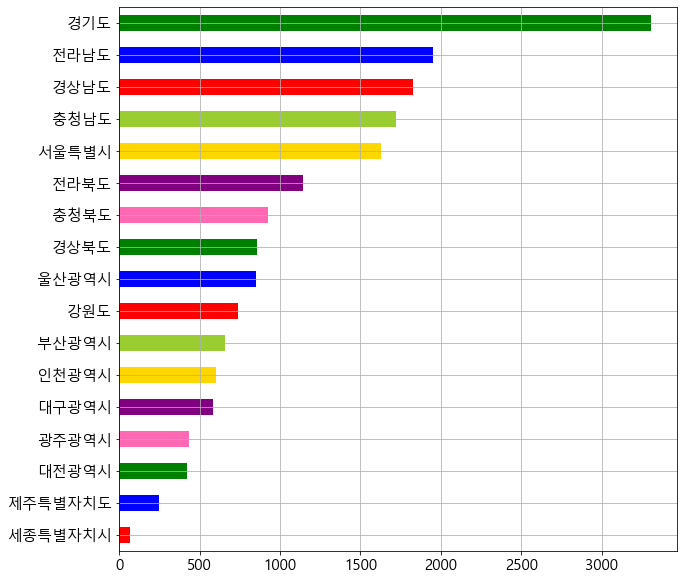

In [49]:
park_do['공원합계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10), 
                                   colors=['red','blue','green','hotpink','purple','gold','yellowgreen'])
plt.show()

# 공원구분별로 데이타프레임 생성하기

In [50]:
park_type = park['공원구분'].value_counts()
park_type

어린이공원       9881
근린공원        4159
소공원         2628
문화공원         304
수변공원         291
기타           248
체육공원         230
역사공원         163
묘지공원          43
도시농업공원        10
도시자연공원         6
도시자연공원구역       2
도시농업공원구역       1
주제공원           1
Name: 공원구분, dtype: int64

In [51]:
df_parkType = park_type.reset_index()

# 컬럼명 변경
df_parkType.columns=['공원구분','합계']
df_parkType

,공원구분,합계
0,어린이공원,9881
1,근린공원,4159
2,소공원,2628
3,문화공원,304
4,수변공원,291
5,기타,248
6,체육공원,230
7,역사공원,163
8,묘지공원,43
9,도시농업공원,10


In [52]:
df_parkType.set_index('공원구분', inplace=True)
df_parkType

,합계
공원구분,
어린이공원,9881
근린공원,4159
소공원,2628
문화공원,304
수변공원,291
기타,248
체육공원,230
역사공원,163
묘지공원,43


In [53]:
df_parkType['비율'] = df_parkType['합계']/df_parkType['합계'].sum()
df_parkType

,합계,비율
공원구분,,
어린이공원,9881,0.549953
근린공원,4159,0.231480
소공원,2628,0.146268
문화공원,304,0.016920
수변공원,291,0.016196
기타,248,0.013803
체육공원,230,0.012801
역사공원,163,0.009072
묘지공원,43,0.002393


In [54]:
df_parkType.head(3)

,합계,비율
공원구분,,
어린이공원,9881,0.549953
근린공원,4159,0.231480
소공원,2628,0.146268


# 경기도
- 경기도의 공원 분포를 분석해보고 시각화한다.

In [55]:
gg = park.loc[park['시도'] == '경기도']
gg.shape

(3304, 14)

In [56]:
gg.head(2)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
224,41590-00153,도와지뜰 어린이공원,어린이공원,경기도 화성시 우정읍 3.1만세로 1049,경기도 화성시 향남읍 발안리 307,37.129358,126.904241,2850.0,031-369-6122,2018-08-23,5530000,경기도 화성시,경기도,화성시
225,41590-00134,매화 쌈지공원,소공원,경기도 화성시 서신면 궁평항로 1702 서신면사무소,경기도 화성시 서신면 매화리 281-2,37.166496,126.708147,942.0,031-369-6122,2018-08-23,5530000,경기도 화성시,경기도,화성시


In [57]:
gg_park = gg['공원구분'].value_counts().reset_index()
gg_park.columns = ('공원구분', '합계')
gg_park

,공원구분,합계
0,어린이공원,1826
1,근린공원,806
2,소공원,394
3,문화공원,85
4,체육공원,74
5,수변공원,59
6,역사공원,32
7,기타,17
8,묘지공원,8
9,도시자연공원,2


# plotnine 패키지 설치하기

In [58]:
# pip install plotnine
# conda install -c conda-forge plotnine 
# conda install -c conda-forge/label/gcc7 plotnine 
# conda install -c conda-forge/label/cf201901 plotnine 

!pip show plotnine

Name: plotnine
Version: 0.6.0
Summary: A grammar of graphics for python
Home-page: https://github.com/has2k1/plotnine
Author: None
Author-email: None
License: GPL-2
Location: c:\anaconda3\lib\site-packages
Requires: patsy, matplotlib, statsmodels, pandas, numpy, scipy, descartes, mizani
Required-by: 


In [59]:
# import plotnine
from plotnine import *

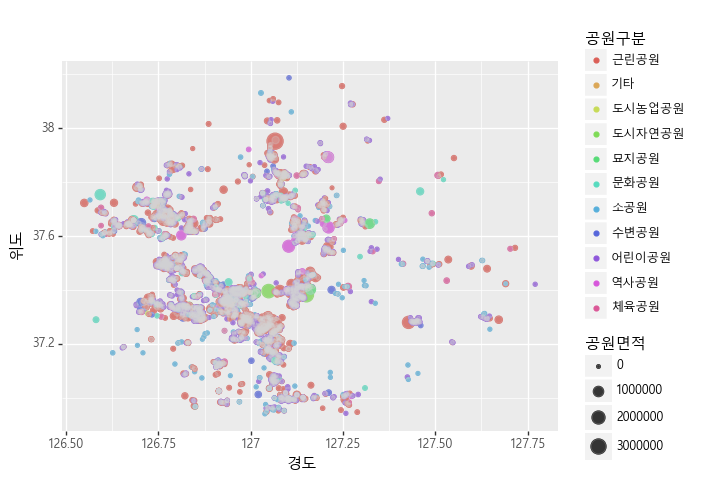

<ggplot: (-9223371898961567756)>

In [60]:
(ggplot(gg)
 + aes(x='경도', y='위도', color='공원구분', size='공원면적') 
 + geom_point()
 + geom_jitter(color='lightgray', alpha=0.25)
 + theme(text=element_text(family='Malgun Gothic'))
)

# 경기도의 어린이공원, 근린공원, 소공원 데이타만 표시

In [61]:
gg.loc[(gg['공원구분'] == '어린이공원') | (gg['공원구분'] == '근린공원') | (gg['공원구분'] == '소공원')]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
224,41590-00153,도와지뜰 어린이공원,어린이공원,경기도 화성시 우정읍 3.1만세로 1049,경기도 화성시 향남읍 발안리 307,37.129358,126.904241,2850.0,031-369-6122,2018-08-23,5530000,경기도 화성시,경기도,화성시
225,41590-00134,매화 쌈지공원,소공원,경기도 화성시 서신면 궁평항로 1702 서신면사무소,경기도 화성시 서신면 매화리 281-2,37.166496,126.708147,942.0,031-369-6122,2018-08-23,5530000,경기도 화성시,경기도,화성시
226,41590-00042,두산2호 어린이공원(반달),어린이공원,경기도 화성시 영통로50번길 14 반달마을2단지두산위브,경기도 화성시 반월동 883-1,37.235699,127.065236,6947.0,031-369-6122,2018-08-23,5530000,경기도 화성시,경기도,화성시
227,41590-00001,센트럴파크(5호),근린공원,경기도 화성시 동탄공원로2길 22,경기도 화성시 경기도 화성시 반송동 59,37.204012,127.063605,374061.0,031-369-6122,2018-08-23,5530000,경기도 화성시,경기도,화성시
228,41590-00111,남양2-2호 근린공원,근린공원,경기도 화성시 남양읍 역골동로 14-10,경기도 화성시 남양읍 남양리 1945-14,37.201710,126.831387,7480.0,031-369-6122,2018-08-23,5530000,경기도 화성시,경기도,화성시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17823,41250-00036,생연공원,근린공원,경기도 동두천시 장고갯로 90(생연동),경기도 동두천시 생연동 산53 일원,37.903089,127.063247,99226.0,031-860-2416,2019-02-13,3920000,경기도 동두천시,경기도,동두천시
17824,41250-00037,송내공원,근린공원,경기도 동두천시 송내로 71번길 19(송내동),경기도 동두천시 송내동 산39 일원,37.885278,127.064714,362407.0,031-860-2416,2019-02-13,3920000,경기도 동두천시,경기도,동두천시
17825,41250-00038,공원37,근린공원,경기도 동두천시 강변로 814(동두천동),경기도 동두천시 동두천동 420-1 일원,37.938441,127.051787,3051.0,031-860-2416,2019-02-13,3920000,경기도 동두천시,경기도,동두천시
17826,41250-00039,공원38,근린공원,경기도 동두천시 강변로 850번길 11(동두천동),경기도 동두천시 동두천동 342-4 일원,37.940551,127.055179,1999.0,031-860-2416,2019-02-13,3920000,경기도 동두천시,경기도,동두천시


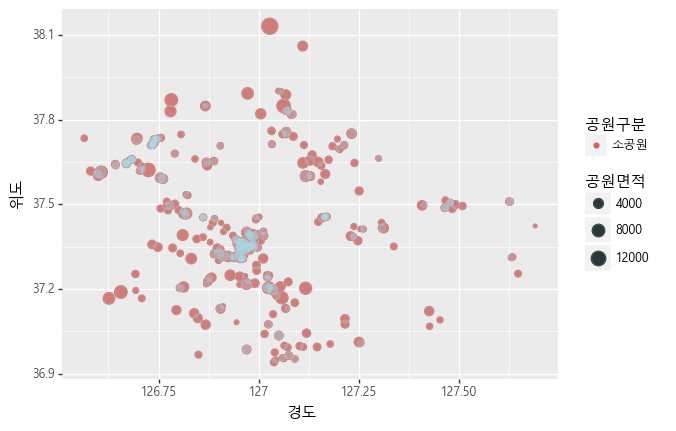

<ggplot: (-9223371898962262092)>

In [62]:
# (ggplot(gg.loc[(gg['공원구분'] == '어린이공원') | (gg['공원구분'] == '근린공원') | (gg['공원구분'] == '소공원')])
(ggplot(gg.loc[(gg['공원구분'] == '소공원')])
 + aes(x='경도', y='위도', color='공원구분', size='공원면적') 
 + geom_point()
 + geom_jitter(color='lightblue', alpha=0.25)
 + theme(text=element_text(family='Malgun Gothic'))
)

# 전국 시도 공원 시각화

In [64]:
park[['위도', '경도']].describe()

,위도,경도
count,17967.000000,17967.000000
mean,36.312198,127.505998
std,1.285072,2.669758
min,0.000000,0.000000
25%,35.260708,126.883322
50%,36.362985,127.140911
75%,37.408948,128.466123
max,38.350990,137.202661


In [65]:
park.loc[(park['위도'] < 26 ) | (park['경도'] >= 132)]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
10312,26710-00002,굿거리언덕공원,근린공원,부산광역시 기장군 기장읍 내리 800,부산광역시 기장군 기장읍 내리 800,25.115601,129.122735,12124.30,051-709-4531,2019-02-13,3400000,부산광역시 기장군,부산광역시,기장군
11273,43745-00020,율리문화공원,문화공원,충청북도 증평군 증평읍 율리 337일원,충청북도 증평군 증평읍 율리 337일원,0.000000,0.000000,6.15,NaN,2019-05-31,5570000,충청북도 증평군,충청북도,증평군
11274,43745-00021,2호수변공원,수변공원,충청북도 증평군 증평읍 율리 514일원,충청북도 증평군 증평읍 율리 514일원,0.000000,0.000000,41.33,NaN,2019-05-31,5570000,충청북도 증평군,충청북도,증평군
11275,43745-00022,노암 소공원1,소공원,충청북도 증평군 도안면 노암리 산40-5번지 일원,충청북도 증평군 도안면 노암리 산40-5번지 일원,0.000000,0.000000,8.04,NaN,2019-05-31,5570000,충청북도 증평군,충청북도,증평군
11276,43745-00023,노암 소공원2,소공원,충청북도 증평군 도안면 노암리 782-1번지 일원,충청북도 증평군 도안면 노암리 782-1번지 일원,0.000000,0.000000,1.49,NaN,2019-05-31,5570000,충청북도 증평군,충청북도,증평군
11277,43745-00024,노암근린공원,근린공원,충청북도 증평군 도안면 노암리 746-2번지 일원,충청북도 증평군 도안면 노암리 746-2번지 일원,0.000000,0.000000,13.15,NaN,2019-05-31,5570000,충청북도 증평군,충청북도,증평군
11279,43745-00026,자전거공원,문화공원,충청북도 증평군 증평읍 남하리 1017-36일원,충청북도 증평군 증평읍 남하리 1017-36일원,0.000000,0.000000,9.81,NaN,2019-05-31,5570000,충청북도 증평군,충청북도,증평군
11280,43745-00027,항일역사공원,역사공원,충청북도 증평군 도안면 석곡리 569일원,충청북도 증평군 도안면 석곡리 569일원,0.000000,0.000000,30.30,NaN,2019-05-31,5570000,충청북도 증평군,충청북도,증평군
13546,43113-00080,근린공원5(만수공원),근린공원,충청북도 청주시 흥덕구 오송읍 만수리 512,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.00,043-201-4433,2019-06-21,5710000,충청북도 청주시,충청북도,청주시


In [67]:
park.loc[(park['위도'] < 26 ) | (park['경도'] >= 132)].shape

(9, 14)

In [68]:
park_loc_notnull = park.loc[(park['위도'] > 32 ) & (park['경도'] < 132) & park['시도'].notnull()]
# park_loc_notnull = park.loc[(park['위도'] > 0 ) & (park['경도'] > 0) ]
park_loc_notnull.shape

(17958, 14)

In [69]:
park_loc_notnull['시도'].value_counts()

경기도        3304
전라남도       1954
경상남도       1825
충청남도       1723
서울특별시      1629
전라북도       1145
충청북도        916
경상북도        854
울산광역시       853
강원도         740
부산광역시       659
인천광역시       604
대구광역시       586
광주광역시       431
대전광역시       419
제주특별자치도     246
세종특별자치시      70
Name: 시도, dtype: int64

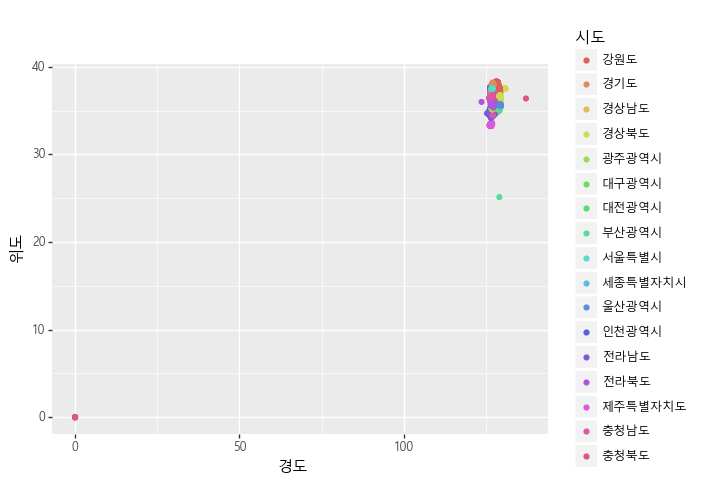

<ggplot: (-9223371898961221616)>

In [70]:
(ggplot(park)
 + aes(x='경도', y='위도', color='시도')
 + geom_point()
 + theme(text=element_text(family='Malgun Gothic'))
)

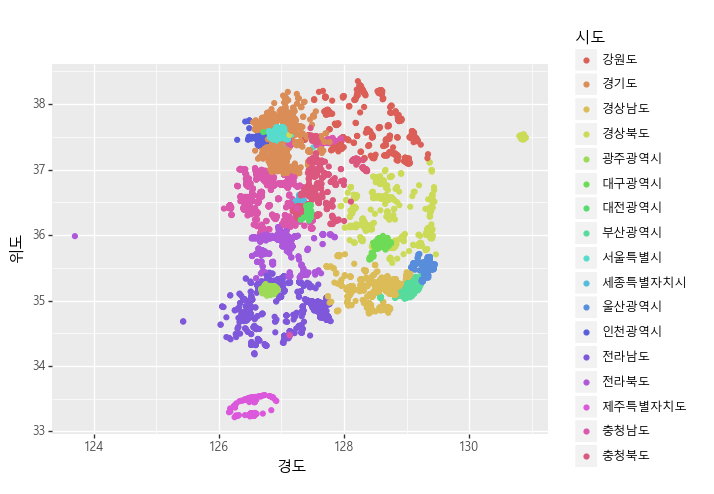

<ggplot: (-9223371898961223164)>

In [71]:
(ggplot(park_loc_notnull)
 + aes(x='경도', y='위도', color='시도')
 + geom_point()
 + theme(text=element_text(family='Malgun Gothic'))
)

# 지도 시각화

In [72]:
import folium

# 수원시 공원보기

In [73]:
gg_suwon = gg.loc[gg['구군'] == '수원시']

In [74]:
mapping = folium.Map(location=[gg_suwon['위도'].mean(), gg_suwon['경도'].mean()], 
                     zoom_start=14)

for n in range(0,len(gg_suwon)):   
    folium.Marker([gg_suwon.iloc[n,5], gg_suwon.iloc[n,6]], 
                                      tooltip=gg_suwon.iloc[n, 1]).add_to(mapping)

mapping

# CircleMarker folium 시각화

In [76]:
gg_suwon['공원면적비율'] = gg_suwon['공원면적'].apply(lambda x : np.sqrt(x)*0.01)
gg_suwon['공원면적비율'].head()

16660    0.300000
16661    0.547905
16662    0.131909
16663    0.332385
16664    0.320983
Name: 공원면적비율, dtype: float64

In [77]:
map = folium.Map(location=[gg_suwon['위도'].mean(), gg_suwon['경도'].mean()], zoom_start=12)

for n in gg_suwon.index:
    park_name = gg_suwon.loc[n, '공원명'] + '-' + gg_suwon.loc[n, '소재지도로명주소']
    icon_color = 'blue'
    folium.CircleMarker(
        location=[gg_suwon.loc[n, '위도'], gg_suwon.loc[n, '경도']],
        radius=gg_suwon['공원면적비율'][n],
        popup=park_name,
        color=icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)
    
map

# 경기도 일부 공원만 보기

In [78]:
park_type = r'.*((역사|체육|수변|문화|묘지)공원).*'
gg_sample = gg.loc[gg['공원구분'].str.match(park_type)]

In [79]:
gg_sample.shape

(258, 14)

In [81]:
# 경기도 일부 공원만 지도에 표기
geo_df = gg_sample

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=11)

for n in geo_df.index:
    park_name = geo_df.loc[n, '공원명'] + ' - ' + geo_df.loc[n, '소재지도로명주소']
    folium.Marker([geo_df.loc[n, '위도'], geo_df.loc[n, '경도']], popup=park_name).add_to(map)
    
map

In [82]:
# 서울특별시 시각화

In [83]:
seoul = park[park['시도'] == '서울특별시']
seoul.shape

(1629, 14)

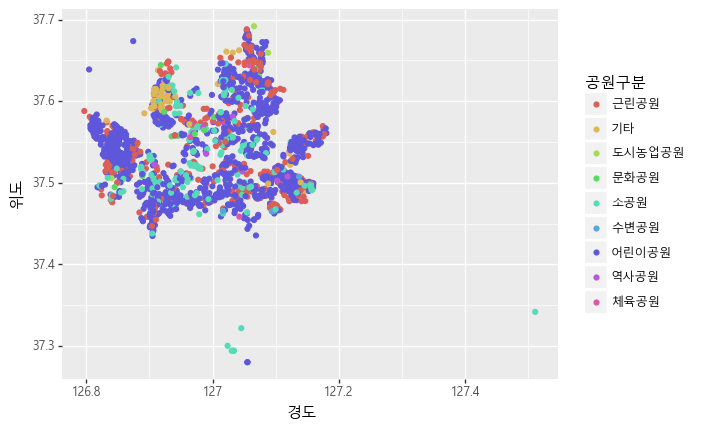

<ggplot: (-9223371898957573688)>

In [84]:
(ggplot(seoul)
 + aes(x='경도', y='위도', color='공원구분') 
 + geom_point()
 + theme(text=element_text(family='Malgun Gothic'))
)

## 잘못 입력된 경도

In [87]:
seoul[seoul["경도"] > 127.4]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
2293,11260-00051,코오롱하늘채앞소공원,소공원,서울특별시 중랑구 면목동 1537-1,서울특별시 중랑구 면목동 1537-1,37.341883,127.51097,1221.8,02-2094-2364,2018-10-08,3060000,서울특별시 중랑구,서울특별시,중랑구


In [88]:
seoul.drop(index=2293, inplace=True)
seoul[seoul["경도"] > 127.4]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군


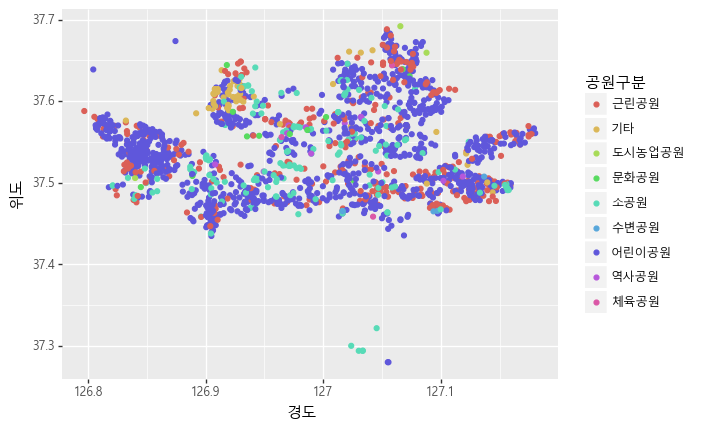

<ggplot: (-9223371898957496728)>

In [89]:
(ggplot(seoul)
 + aes(x='경도', y='위도', color='공원구분') 
 + geom_point()
 + theme(text=element_text(family='Malgun Gothic'))
)

# 서울시 공원구분

In [90]:
seoul['공원구분'].value_counts()

어린이공원     1041
근린공원       337
소공원        165
기타          51
문화공원        12
역사공원        12
수변공원         4
도시농업공원       3
체육공원         3
Name: 공원구분, dtype: int64

In [91]:
seoul_playground = park.loc[(park['공원구분'] == '어린이공원') & (park['시도'] == '서울특별시')]
seoul_playground.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
824,11110-00030,창신공원,어린이공원,서울특별시 종로구 창신 23-362,서울특별시 종로구 창신 23-362,37.578276,127.012931,710.0,02-2148-4156,2018-08-16,3000000,서울특별시 종로구,서울특별시,종로구
825,11110-00031,당고개공원,어린이공원,서울특별시 종로구 창신 23-350,서울특별시 종로구 창신 23-350,37.575762,127.012382,860.0,02-2148-4156,2018-08-16,3000000,서울특별시 종로구,서울특별시,종로구
826,11110-00032,무악공원,어린이공원,서울특별시 종로구 무악동 산2-83,서울특별시 종로구 무악동 산2-83,37.577525,126.960547,5136.0,02-2148-4156,2018-08-16,3000000,서울특별시 종로구,서울특별시,종로구
829,11110-00029,낙산공원,어린이공원,서울특별시 종로구 창신길 210-11 (창신동),서울특별시 종로구 창신 611-19,37.579718,127.010456,660.0,02-2148-4156,2018-08-16,3000000,서울특별시 종로구,서울특별시,종로구
830,11110-00001,참샘골공원,어린이공원,서울특별시 종로구 평창 470,서울특별시 종로구 평창 470,37.615353,126.974640,2737.0,02-2148-4156,2018-08-16,3000000,서울특별시 종로구,서울특별시,종로구


# 구별 공원 분포

In [93]:
gu = '강남구 강동구 강북구 강서구 관악구 광진구 구로구 금천구 노원구 도봉구 동대문구 동작구 마포구 서대문구 서초구 성동구 성북구 송파구 양천구 영등포구 용산구 은평구 종로구 중구 중랑구'
gu = gu.split(' ')
print('서울에는 {}개의 구가 있다.'.format(len(gu)))

서울에는 25개의 구가 있다.


In [94]:
seoul_gu = seoul['구군'].value_counts().reset_index()
seoul_gu_count = seoul_gu.shape[0]
seoul_gu.head()

,index,구군
0,송파구,158
1,강서구,139
2,강남구,134
3,노원구,118
4,서초구,114


In [95]:
seoul_gu.columns = ['구군', '합계']
seoul_gu = seoul_gu.sort_values(by='합계', ascending=False)
# 누락된 구를 찾기 위해 데이터프레임에 들어있는 구군을 추출한다.
seoul_gu_unique = seoul_gu['구군'].unique()
seoul_gu_unique

array(['송파구', '강서구', '강남구', '노원구', '서초구', '은평구', '양천구', '관악구', '강동구',
       '금천구', '동작구', '중랑구', '서대문구', '성동구', '구로구', '강북구', '동대문구', '성북구',
       '영등포구', '용산구', '광진구', '종로구', '중구', '도봉구'], dtype=object)

# 강남3구 공원 분포

In [96]:
geo_df = seoul.loc[seoul['구군'].str.match( r'((강남|서초|송파)구)')]
geo_df.shape

(406, 14)

In [98]:
geo_df = geo_df.loc[(geo_df['위도'].notnull()) & (geo_df['경도'].notnull())]
geo_df.isnull().sum()

관리번호        0
공원명         0
공원구분        0
소재지도로명주소    0
소재지지번주소     0
위도          0
경도          0
공원면적        0
전화번호        0
데이터기준일자     0
제공기관코드      0
제공기관명       0
시도          0
구군          0
dtype: int64

In [99]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=13)

for n in geo_df.index:
    park_name = geo_df.loc[n, '공원명'] + ' - ' + geo_df.loc[n, '소재지도로명주소']
    folium.Marker([geo_df.loc[n, '위도'], geo_df.loc[n, '경도']], popup=park_name).add_to(map)
map